In [22]:
import numpy as np
import tensorflow as tf
import string
import matplotlib.pyplot as plt

In [23]:
test_Raw = np.genfromtxt(r'C:\Users\parkf\OneDrive\Desktop\CodePractice\PythonPractice\signLangMNIST\archive\sign_mnist_test.csv', delimiter=',',
    skip_header=1)

train_Raw = np.genfromtxt(r'C:\Users\parkf\OneDrive\Desktop\CodePractice\PythonPractice\signLangMNIST\archive\sign_mnist_train.csv', delimiter=',',
    skip_header=1)

print('Number of nan entries (test): ', np.sum(np.isnan(test_Raw)))
print('Number of nan entries (train): ', np.sum(np.isnan(train_Raw)))

Number of nan entries (test):  0
Number of nan entries (train):  0


In [24]:
y_Train = train_Raw[:, 0]
X_Train = train_Raw[:, 1:]

y_Test = test_Raw[:, 0]
X_Test = test_Raw[:, 1:]

X_Train = np.reshape(X_Train, (-1, 28, 28, 1))
X_Test = np.reshape(X_Test, (-1, 28, 28, 1))

label_Dict = dict(zip(range(26), string.ascii_uppercase))
print(label_Dict)

{0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'J', 10: 'K', 11: 'L', 12: 'M', 13: 'N', 14: 'O', 15: 'P', 16: 'Q', 17: 'R', 18: 'S', 19: 'T', 20: 'U', 21: 'V', 22: 'W', 23: 'X', 24: 'Y', 25: 'Z'}


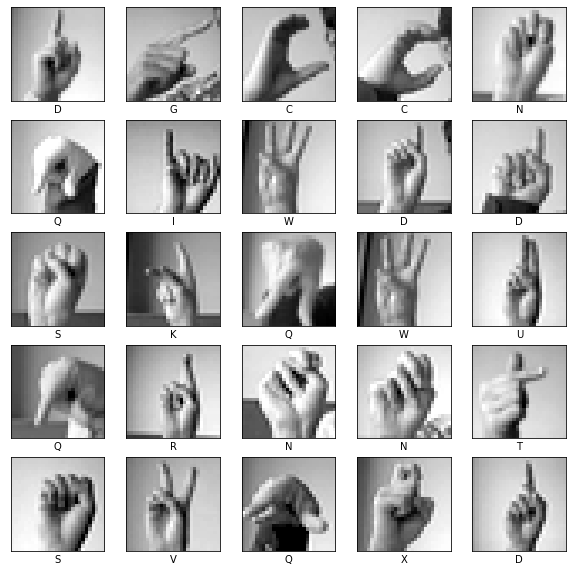

In [25]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_Train[i], cmap='gray')
    plt.xlabel(label_Dict[y_Train[i]])
plt.show()

In [31]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=(28,28,1), name='Input'))
model.add(tf.keras.layers.Conv2D(16, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
# TODO Test with/without batch norming or dropout here #
# First results show a lot of evidence of overfitting
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Dropout(0.2))
# Head of model for classification
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(26))

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 13, 13, 16)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 5, 5, 32)         0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 5, 5, 32)          0         
                                                                 
 flatten_5 (Flatten)         (None, 800)              

In [32]:
model.compile(optimizer='adam',
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'])

y_Train_Hot = tf.keras.utils.to_categorical(y_Train, num_classes=26)

history = model.fit(X_Train, y_Train_Hot, epochs=10, 
    validation_split=.2,
    verbose=0)

225/225 - 1s - loss: 0.5384 - accuracy: 0.9149 - 504ms/epoch - 2ms/step
Test acc: 0.9149470329284668


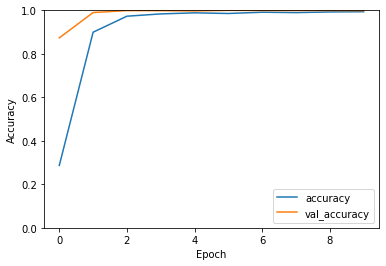

In [33]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_Test,  tf.keras.utils.to_categorical(y_Test, num_classes=26), verbose=2)
print('Test acc:', test_acc)

In [34]:
model.save('cnn_Model')

INFO:tensorflow:Assets written to: cnn_Model\assets


INFO:tensorflow:Assets written to: cnn_Model\assets


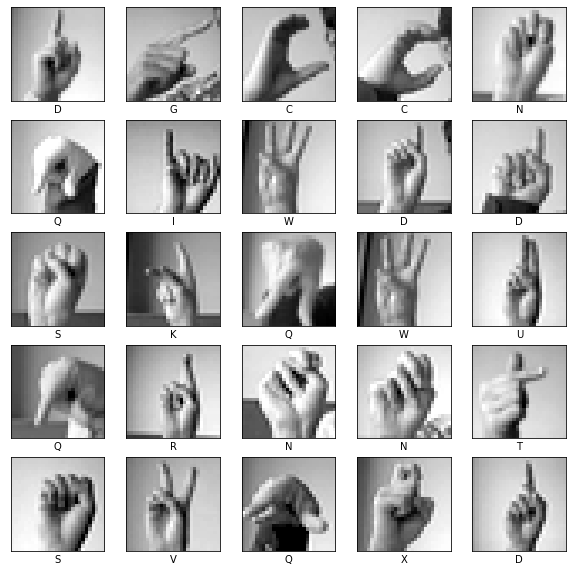

In [46]:
y =np.argmax(model.predict(X_Train), axis=1)

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_Train[i], cmap='gray')
    plt.xlabel(label_Dict[y[i]])
plt.show()
